In [2]:
# Important library import 
import cv2
import numpy as np 
import requests
from PIL import Image 

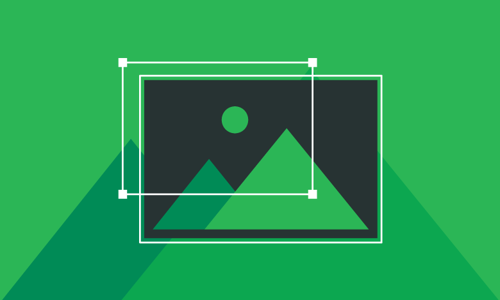

In [10]:
# Reading image from url 
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

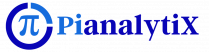

In [11]:
# Reading logo from url 
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo

In [12]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [13]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [14]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

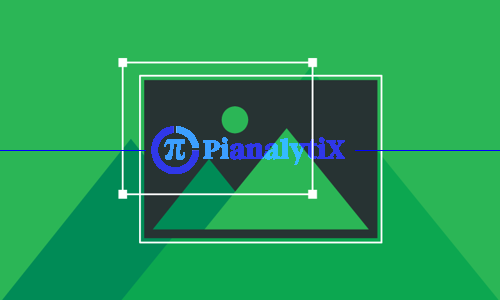

In [15]:
# Ploting logo watermark image 
img = Image.fromarray(image_logow, 'RGB')
img

In [18]:
# Text Watermark 
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='shoya', org=(w_image - 95, h_image - 10), fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.5, color=(255, 0, 0), thickness = 2, lineType= cv2.LINE_4);

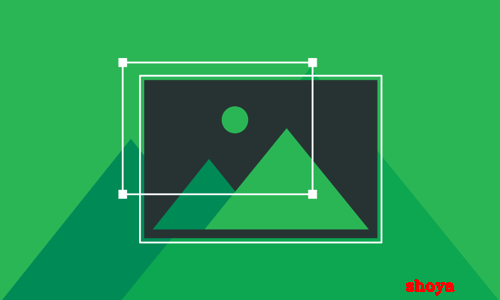

In [19]:
# Ploting text watermark image 
img = Image.fromarray(image_text, 'RGB')
img